In [545]:
import pandas as pd
import imblearn
import numpy as np
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
import scikitplot as skplt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn import linear_model
from tqdm import tqdm, trange
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [513]:
df = pd.read_csv('dataset.csv', low_memory = False)

#df

In [244]:
df.dtypes

TempSNO                             int64
gender_id                           int64
patient_age                         int64
city_id                            object
Ethicity_language                  object
date_of_admission                  object
date_of_surgery                    object
date_of_discharge                  object
Admission_to_surgery                int64
LOS_Surgery_to_discharge            int64
BMI                                object
Active_tobacco_use                  int64
f_history_cad                       int64
diabetes                            int64
last_hematocrit                   float64
Dyslipidemia                       object
last_cretenine_preop              float64
dialysis                            int64
hypertension                        int64
BPsystolic                         object
Cerebovascular_disease              int64
Carotid_disease                     int64
chronic_lung_disease                int64
FirstCVSurgery                    

In [514]:
# drop 1
df0 = df.drop(columns = ['TempSNO', 'city_id', 'Ethicity_language','specify_other', 'mortality_date'])
df0 = df0.replace(r'^\s*$', np.nan, regex=True)

In [253]:
df0.dtypes

gender_id                           int64
patient_age                         int64
date_of_admission                  object
date_of_surgery                    object
date_of_discharge                  object
Admission_to_surgery                int64
LOS_Surgery_to_discharge            int64
BMI                                object
Active_tobacco_use                  int64
f_history_cad                       int64
diabetes                            int64
last_hematocrit                   float64
Dyslipidemia                       object
last_cretenine_preop              float64
dialysis                            int64
hypertension                        int64
BPsystolic                         object
Cerebovascular_disease              int64
Carotid_disease                     int64
chronic_lung_disease                int64
FirstCVSurgery                      int64
previous_cv_interventions           int64
previous_coronary_bypass            int64
previous_valve                    

In [515]:
df0 = df0.drop(columns = ['date_of_admission', 'date_of_surgery','date_of_discharge','or_entry_date', 'or_entry_time','or_exit_date', 'or_exit_time', 'intubation_time', 'extubation_time','skin_incision_start_date','skin_incision_start_time','skin_incision_closure_date','skin_incision_closure_time' ])

In [516]:
# Checking columns for missing values
col_list = []
for i in range(df0.shape[1]):
# count number of rows with missing values
    n_miss = df0.iloc[:,i].isnull().sum()
    if n_miss > 0:
        col_list.append(i)
    perc = n_miss / df0.shape[0] * 100
    print("{0}: Missing Values: {1}, ({2})".format(i, n_miss, perc))

0: Missing Values: 0, (0.0)
1: Missing Values: 0, (0.0)
2: Missing Values: 0, (0.0)
3: Missing Values: 0, (0.0)
4: Missing Values: 22, (0.41021816147678536)
5: Missing Values: 0, (0.0)
6: Missing Values: 0, (0.0)
7: Missing Values: 0, (0.0)
8: Missing Values: 0, (0.0)
9: Missing Values: 11, (0.20510908073839268)
10: Missing Values: 0, (0.0)
11: Missing Values: 0, (0.0)
12: Missing Values: 0, (0.0)
13: Missing Values: 26, (0.4848032817452918)
14: Missing Values: 0, (0.0)
15: Missing Values: 0, (0.0)
16: Missing Values: 0, (0.0)
17: Missing Values: 0, (0.0)
18: Missing Values: 0, (0.0)
19: Missing Values: 0, (0.0)
20: Missing Values: 0, (0.0)
21: Missing Values: 0, (0.0)
22: Missing Values: 0, (0.0)
23: Missing Values: 0, (0.0)
24: Missing Values: 0, (0.0)
25: Missing Values: 0, (0.0)
26: Missing Values: 0, (0.0)
27: Missing Values: 0, (0.0)
28: Missing Values: 0, (0.0)
29: Missing Values: 0, (0.0)
30: Missing Values: 0, (0.0)
31: Missing Values: 0, (0.0)
32: Missing Values: 0, (0.0)
33:

In [517]:
x = df0.iloc[:,col_list]
x.columns

Index(['BMI', 'Dyslipidemia', 'BPsystolic', 'LM_specify', 'intubation_date',
       'extubation_date', 'CPB_utilization_plan', 'perfusion_time_min',
       'FemoralArteryandFemVein', 'AortaandAtrialCaval',
       'cannulation_method_other', 'None_F', 'AorticCrossClamp',
       'BalloonOcclusion', 'PartialCrossClamp', 'cross_clamp_time_min',
       'IABP_indication', 'red_blood_cell_units_A',
       'fresh_frozen_plasma_units_A', 'cryoprecipitate_units_A',
       'platelet_units_A', 'no_of_ima_distal', 'DirectVision',
       'distal_anastomoses', 'initial_hours_ventilated', 'initial_icu_hours',
       'initial_icu_stay', 'additional_icu_hours',
       'additional_hours_ventilated', 'drainage_at_12_hours',
       'drainage_at_24_hours', 'post_op_creatinine'],
      dtype='object')

In [188]:
col_list

[4,
 9,
 13,
 55,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 77,
 78,
 79,
 83,
 84,
 86,
 89,
 90,
 91,
 93,
 101,
 103,
 104,
 107]

In [518]:
# BMI
df0['BMI'] = pd.to_numeric(df0['BMI'],errors = 'coerce')
for i in trange(df0.shape[0]):
    df0['BMI'][i] = (df0['weight'][i])/(df0['height'][i]/100)**2

  0%|          | 0/5363 [00:00<?, ?it/s]D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
100%|██████████| 5363/5363 [04:32<00:00, 19.67it/s]


In [519]:
# additional_icu_hours ref: readmission
df0['additional_icu_hours']= pd.to_numeric(df0['additional_icu_hours'],errors = 'coerce')
df0['additional_icu_hours'] = df0['additional_icu_hours'].fillna(0)
df0['additional_icu_hours'] = df0['additional_icu_hours'].apply(lambda x:x/24)

# additional_hours_ventilated ref: reintubated
df0['additional_hours_ventilated']= pd.to_numeric(df0['additional_hours_ventilated'],errors = 'coerce')
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].fillna(0)
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].apply(lambda x:x/24)


# red_blood_cells_units_A ref: intaop_blood_products
df0['red_blood_cell_units_A'] = pd.to_numeric(df0['red_blood_cell_units_A'],errors = 'coerce')
df0['red_blood_cell_units_A'] = df0['red_blood_cell_units_A'].fillna(0)

# fresh_frozen_plasma_units_A ref: intaop_blood_products
df0['fresh_frozen_plasma_units_A'] = pd.to_numeric(df0['fresh_frozen_plasma_units_A'],errors = 'coerce')
df0['fresh_frozen_plasma_units_A'] = df0['fresh_frozen_plasma_units_A'].fillna(0)

# cryoprecipitate_units_A ref: intaop_blood_products
df0['cryoprecipitate_units_A'] = pd.to_numeric(df0['cryoprecipitate_units_A'],errors = 'coerce')
df0['cryoprecipitate_units_A'] = df0['cryoprecipitate_units_A'].fillna(0)

# platelet_units_A ref: intaop_blood_products
df0['platelet_units_A'] = pd.to_numeric(df0['platelet_units_A'],errors = 'coerce')
df0['platelet_units_A'] = df0['platelet_units_A'].fillna(0)

# no_of_ima_distal ref: IMA
df0['no_of_ima_distal'] = pd.to_numeric(df0['no_of_ima_distal'],errors = 'coerce')
df0['no_of_ima_distal'] = df0['no_of_ima_distal'].fillna(0)

# DirectVision ref: IMA
df0['DirectVision'] = pd.to_numeric(df0['DirectVision'],errors = 'coerce')
df0['DirectVision'] = df0['DirectVision'].fillna(0)

# distal_anastomoses: Radial Conduit
df0['distal_anastomoses'] = pd.to_numeric(df0['distal_anastomoses'],errors = 'coerce')
df0['distal_anastomoses'] = df0['distal_anastomoses'].fillna(0)

# IABP_indication ref: IABP
df0['IABP_indication'] = pd.to_numeric(df0['IABP_indication'],errors = 'coerce')
df0['IABP_indication'] = df0['IABP_indication'].fillna(0)

# CPB_utilization_plan
df0['CPB_utilization_plan'] = pd.to_numeric(df0['CPB_utilization_plan'],errors = 'coerce')
df0['CPB_utilization_plan'] = df0['CPB_utilization_plan'].fillna(0)

# FemoralArteryandFemVein
df0['FemoralArteryandFemVein'] = pd.to_numeric(df0['FemoralArteryandFemVein'],errors = 'coerce')
df0['FemoralArteryandFemVein'] = df0['FemoralArteryandFemVein'].fillna(0)

# AortaandAtrialCaval
df0['AortaandAtrialCaval'] = pd.to_numeric(df0['AortaandAtrialCaval'],errors = 'coerce')
df0['AortaandAtrialCaval'] = df0['AortaandAtrialCaval'].fillna(0)

# cannulation_method_other
df0['cannulation_method_other'] = pd.to_numeric(df0['cannulation_method_other'],errors = 'coerce')
df0['cannulation_method_other'] = df0['cannulation_method_other'].fillna(0)

# None_F
df0['None_F'] = pd.to_numeric(df0['None_F'],errors = 'coerce')
df0['None_F'] = df0['None_F'].fillna(0)

# AorticCrossClamp
df0['AorticCrossClamp'] = pd.to_numeric(df0['AorticCrossClamp'],errors = 'coerce')
df0['AorticCrossClamp'] = df0['AorticCrossClamp'].fillna(0)

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion']

# PartialCrossClamp
df0['PartialCrossClamp'] = pd.to_numeric(df0['PartialCrossClamp'],errors = 'coerce')
df0['PartialCrossClamp'] = df0['PartialCrossClamp'].fillna(0)

# cross_clamp_time_min
df0['cross_clamp_time_min'] = pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].fillna(0)

# perfusion_time_min
df0['perfusion_time_min'] = pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].fillna(0)

# post_op_creatinine
df0['post_op_creatinine']= pd.to_numeric(df0['post_op_creatinine'],errors = 'coerce')
df0['post_op_creatinine'] = df0['post_op_creatinine'].interpolate(method = 'polynomial', order = 2)

# drainage_at_12_hours
df0['drainage_at_12_hours']= pd.to_numeric(df0['drainage_at_12_hours'],errors = 'coerce')
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].apply(lambda x:x/1000)

# drainage_at_24_hours
df0['drainage_at_24_hours']= pd.to_numeric(df0['drainage_at_24_hours'],errors = 'coerce')
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].apply(lambda x:x/1000)

df0.loc[df0['icu_visit'] == 0, 'initial_icu_hours'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_hours_ventilated'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_icu_stay'] = 0

# initial_hours_ventilated
df0['initial_hours_ventilated']= pd.to_numeric(df0['initial_hours_ventilated'],errors = 'coerce')
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].interpolate(method = 'polynomial', order = 2)
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].apply(lambda x:x/24)

# initial_icu_hours
df0['initial_icu_hours']= pd.to_numeric(df0['initial_icu_hours'],errors = 'coerce')
df0['initial_icu_hours'] = df0['initial_icu_hours'].interpolate(method = 'polynomial', order = 2)


# initial_icu_stay
df0['initial_icu_stay']= pd.to_numeric(df0['initial_icu_stay'],errors = 'coerce')
df0['initial_icu_stay'] = df0['initial_icu_stay'].interpolate(method = 'polynomial', order = 2)
df0['initial_icu_stay'] = df0['initial_icu_stay'].apply(lambda x:x/24)

# BPsystolic
df0['BPsystolic'] = pd.to_numeric(df0['BPsystolic'],errors = 'coerce')
m1 = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].mean()
m2 = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].mean()
df0.loc[df0['hypertension'] == 1, 'BPsystolic'] = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].fillna(m1)#isnull().sum()
df0.loc[df0['hypertension'] == 0, 'BPsystolic'] = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].fillna(m2)#isnull().sum()

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion'].fillna(0)

# LM_specify, weight, height, initial_icu_hours
df0 = df0.drop(columns = ['LM_specify','weight','height','initial_icu_hours'])

# inubation and extubation
df0['intubation_date'] = pd.to_datetime(df0.intubation_date)
df0['extubation_date'] = pd.to_datetime(df0.extubation_date)
df0['intubation_to_extubation'] = (df0['extubation_date'] - df0['intubation_date']).dt.days

# cross_clamp_time_min
df0['cross_clamp_time_min']= pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].apply(lambda x:x/1440)

# perfusion_time_min
df0['perfusion_time_min']= pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].apply(lambda x:x/1440)

# ejection_fraction
df0['ejection_fraction']= pd.to_numeric(df0['ejection_fraction'],errors = 'coerce')
df0['ejection_fraction'] = df0['ejection_fraction'].apply(lambda x:x/100)

# gender_id
df0['gender_id'] = df0['gender_id'].apply(lambda x: x-1) # from male = 1 & female = 2, to , male = 0 & female = 1

# Cardiac_Presentation_on_Admission
df0['Cardiac_Presentation_on_Admission'] = df0['Cardiac_Presentation_on_Admission'].apply(lambda x: x-1) # 

# drop intubation and extubation
df0 = df0.drop(columns = ['intubation_date','extubation_date'])

# drop na
df0 = df0.dropna()
i_2_e = df0.pop('intubation_to_extubation')
df0.insert(0,'intubation_to_extubation', i_2_e)
df0 = df0.apply(pd.to_numeric)
df0 = df0.loc[df0['drainage_at_12_hours'] >=0 ]
df0 = df0.loc[df0['drainage_at_24_hours'] >=0 ]
df0 = df0.loc[df0['post_op_creatinine'] >=0 ]
df0 = df0.loc[df0['intubation_to_extubation'] >= 0]
df0 = df0.loc[df0['initial_hours_ventilated'] >= 0]
df0

,intubation_to_extubation,gender_id,patient_age,Admission_to_surgery,LOS_Surgery_to_discharge,BMI,Active_tobacco_use,f_history_cad,diabetes,last_hematocrit,...,heart_block,cardiac_arrest,ventricular_arrythmia,inotropics_used,atrial_fibrillation,dialysis_newly_required,post_operative_stroke,sternum_deep,or_for_sternal_debridement,in_hospital_mortality
0,1.0,0,64,2,5,22.476587,0,1,0,45.1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,75,4,7,27.500000,0,1,2,30.7,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0,53,1,4,20.795848,0,0,0,45.3,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,45,4,5,25.216253,0,0,1,36.5,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0,58,3,5,22.204082,0,1,1,42.3,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0,50,5,5,33.078285,0,1,0,40.4,...,0,0,0,0,0,0,0,0,0,0
7,0.0,1,49,1,6,31.245237,0,0,2,40.4,...,0,0,0,0,0,0,0,0,0,0
8,1.0,0,65,3,6,22.724403,0,1,0,40.1,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0,62,5,6,28.010224,0,0,1,40.0,...,0,0,0,0,0,0,0,0,0,0
10,0.0,0,57,1,7,31.992171,1,1,1,43.1,...,0,0,0,0,0,0,0,0,0,0


In [264]:

df0

,intubation_to_extubation,gender_id,patient_age,Admission_to_surgery,LOS_Surgery_to_discharge,BMI,Active_tobacco_use,f_history_cad,diabetes,last_hematocrit,...,heart_block,cardiac_arrest,ventricular_arrythmia,inotropics_used,atrial_fibrillation,dialysis_newly_required,post_operative_stroke,sternum_deep,or_for_sternal_debridement,in_hospital_mortality
0,1.0,0,64,2,5,22.476587,0,1,0,45.1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,75,4,7,27.500000,0,1,2,30.7,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0,53,1,4,20.795848,0,0,0,45.3,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,45,4,5,25.216253,0,0,1,36.5,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0,58,3,5,22.204082,0,1,1,42.3,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0,50,5,5,33.078285,0,1,0,40.4,...,0,0,0,0,0,0,0,0,0,0
7,0.0,1,49,1,6,31.245237,0,0,2,40.4,...,0,0,0,0,0,0,0,0,0,0
8,1.0,0,65,3,6,22.724403,0,1,0,40.1,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0,62,5,6,28.010224,0,0,1,40.0,...,0,0,0,0,0,0,0,0,0,0
10,0.0,0,57,1,7,31.992171,1,1,1,43.1,...,0,0,0,0,0,0,0,0,0,0


In [474]:
df0.to_csv('df0.csv')

In [267]:
df0.dtypes

intubation_to_extubation             float64
gender_id                              int64
patient_age                            int64
Admission_to_surgery                   int64
LOS_Surgery_to_discharge               int64
BMI                                  float64
Active_tobacco_use                     int64
f_history_cad                          int64
diabetes                               int64
last_hematocrit                      float64
Dyslipidemia                           int64
last_cretenine_preop                 float64
dialysis                               int64
hypertension                           int64
BPsystolic                           float64
Cerebovascular_disease                 int64
Carotid_disease                        int64
chronic_lung_disease                   int64
FirstCVSurgery                         int64
previous_cv_interventions              int64
previous_coronary_bypass               int64
previous_valve                         int64
intracardi

# base-line models

In [526]:
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:-500,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:-500,len(df0.columns)-1] # target variable only

data_Vx =  df0.iloc[500:, 0: len(df0.columns)-1]
data_Vy = df0.iloc[500:,len(df0.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

# CV 

# Logistic Regression

In [289]:

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5,random_state = 10)
model = LogisticRegression()
scores = cross_validate(model, data_X, data_Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('CV ROC with Logistic Regression: %.3f' % (scores['test_score'].mean()))

CV ROC with Logistic Regression: 0.954


# Random Forest

In [290]:

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5,random_state = 10)
model = RandomForestClassifier()
scores = cross_validate(model, data_X, data_Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('CV ROC with Random Forest: %.3f' % (scores['test_score'].mean()))

CV ROC with Random Forest: 0.997


# XGBoost

In [291]:

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5,random_state = 10)
model = XGBClassifier()
scores = cross_validate(model, data_X, data_Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('CV ROC with XGBClassifier: %.3f' % (scores['test_score'].mean()))

CV ROC with XGBClassifier: 0.997


# Standalone Models (Imbalanced Data)

In [527]:
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:-500,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:-500,len(df0.columns)-1] # target variable only

data_Vx =  df0.iloc[500:, 0: len(df0.columns)-1]
data_Vy = df0.iloc[500:,len(df0.columns)-1]

#oversample = SMOTE()
#X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

# XGBoost

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:01:39] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4692
           1       0.93      0.95      0.94       133

    accuracy                           1.00      4825
   macro avg       0.97      0.98      0.97      4825
weighted avg       1.00      1.00      1.00      4825



ROC is 0.976484529738669


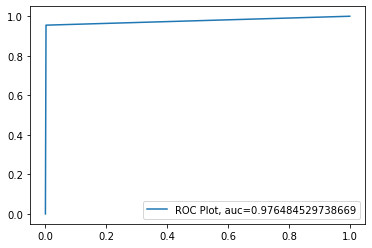

In [445]:
model = XGBClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(data_Vx)
y_pred_proba = model.predict_proba(data_Vx)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(data_Vy, predictions)
#print(accuracy)
print(classification_report(data_Vy,predictions))
print("\n\nROC is",roc_auc_score(data_Vy,predictions))

# calc ROC on new samples
y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4692
           1       0.91      0.75      0.82       133

    accuracy                           0.99      4825
   macro avg       0.95      0.87      0.91      4825
weighted avg       0.99      0.99      0.99      4825



ROC is 0.8748742059752962


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


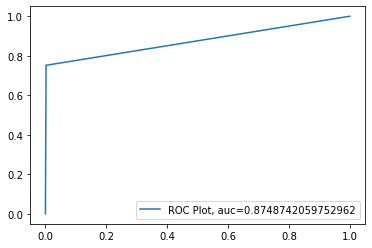

In [446]:
model = LogisticRegression()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(data_Vx)
y_pred_proba = model.predict_proba(data_Vx)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(data_Vy, predictions)
#print(accuracy)
print(classification_report(data_Vy,predictions))
print("\n\nROC is",roc_auc_score(data_Vy,predictions))

# calc ROC on new samples
y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4692
           1       0.97      0.92      0.94       133

    accuracy                           1.00      4825
   macro avg       0.98      0.96      0.97      4825
weighted avg       1.00      1.00      1.00      4825



ROC is 0.9582203590818479


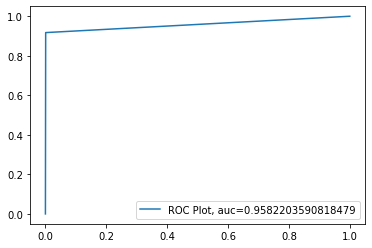

In [447]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(data_Vx)
y_pred_proba = model.predict_proba(data_Vx)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(data_Vy, predictions)
#print(accuracy)
print(classification_report(data_Vy,predictions))
print("\n\nROC is",roc_auc_score(data_Vy,predictions))

# calc ROC on new samples
y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Standalone Models (Balanced Data)

In [533]:
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:-500,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:-500,len(df0.columns)-1] # target variable only

data_Vx =  df0.iloc[500:, 0: len(df0.columns)-1]
data_Vy = df0.iloc[500:,len(df0.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

# XGB Classifier

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:09] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4662
           1       0.97      0.99      0.98       143

    accuracy                           1.00      4805
   macro avg       0.98      0.99      0.99      4805
weighted avg       1.00      1.00      1.00      4805



ROC is 0.9924707424707425


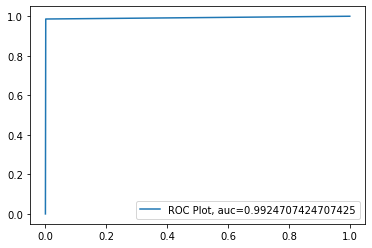

In [534]:
model = XGBClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(data_Vx)
y_pred_proba = model.predict_proba(data_Vx)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(data_Vy, predictions)
#print(accuracy)
print(classification_report(data_Vy,predictions))
print("\n\nROC is",roc_auc_score(data_Vy,predictions))

# calc ROC on new samples
y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression

0.9824
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       941
           1       0.97      0.99      0.98       934

    accuracy                           0.98      1875
   macro avg       0.98      0.98      0.98      1875
weighted avg       0.98      0.98      0.98      1875

0.9824296217746395


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


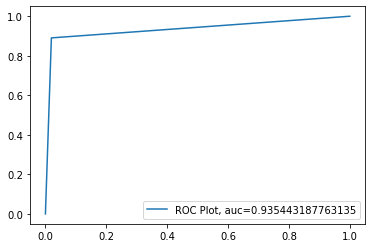

In [363]:
model = LogisticRegression()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(data_Vx)
y_pred_proba = model.predict_proba(data_Vx)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(data_Vy, predictions)
#print(accuracy)
print(classification_report(data_Vy,predictions))
print("\n\nROC is",roc_auc_score(data_Vy,predictions))

# calc ROC on new samples
y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

0.9962666666666666
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       941
           1       0.99      1.00      1.00       934

    accuracy                           1.00      1875
   macro avg       1.00      1.00      1.00      1875
weighted avg       1.00      1.00      1.00      1875

0.9962765703258868


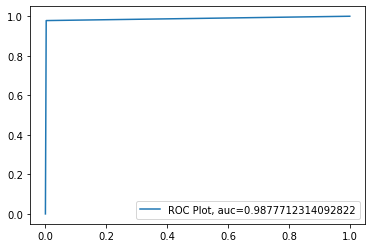

In [364]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(data_Vx)
y_pred_proba = model.predict_proba(data_Vx)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(data_Vy, predictions)
#print(accuracy)
print(classification_report(data_Vy,predictions))
print("\n\nROC is",roc_auc_score(data_Vy,predictions))

# calc ROC on new samples
y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification Models (For Feature Selection Techniques)

# XGBClassifier + RF, L1, L2, XGB 

In [436]:
def XGBoost_ridge_RF_lasso_xgb_rfe(X_train_list, X_test_list, Y_train, Y_test, n_comp):
  acc_list = []
  for i in range(0,len(X_train_list)):

    model = XGBClassifier()
    model.fit(X_train_list[i], Y_train)

    # make predictions for test data
    y_pred = model.predict(X_test_list[i])
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = roc_auc_score(Y_test, predictions)
    acc_list.append(accuracy)
    #n_comp_list.append(pca.n_components_)
    print("\n\nROC is {0}  when Features are {1}".format(accuracy,n_comp[i]))
  #print("\n\nThe % of Varience Explained is {0} % ".format(pca_var_explained[i]*100))
    print("\n\n")
    print(classification_report(Y_test,y_pred))
  table = pd.DataFrame({'Features': n_comp, 'ROC': acc_list})
  table = table.drop_duplicates()
  print(table) 

  return (n_comp, acc_list)

def XGBoost_pca (X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train, Y_test):
  n_comp_list = []
  acc_list = []
  for i in range(0,len(X_train_pca_list)):

    model = XGBClassifier()
    model.fit(X_train_pca_list[i], Y_train)

    # make predictions for test data
    y_pred = model.predict(X_test_pca_list[i])
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = roc_auc_score(Y_test, predictions)
    acc_list.append(accuracy)
    #n_comp_list.append(pca.n_components_)
    print("\n\nROC is {0} when Principal components (features) are {1}".format(accuracy ,pca_features_list[i]))
    #print("\n\nThe % of Varience Explained is {0} % ".format(pca_var_explained[i]*100))
    print("\n\n")
    print(classification_report(Y_test,y_pred))
  table = pd.DataFrame({'Features': pca_features_list, 'ROC': acc_list})
  table = table.drop_duplicates()
  print(table) 
  
  return (pca_features_list, acc_list)



# Logistic Regression + RF, XGB, L1, L2, 

In [435]:
def logreg_pca (X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train, Y_test):
  n_comp_list = []
  acc_list = []
  for i in range(0,len(X_train_pca_list)):

    model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter= 1000)
    model.fit(X_train_pca_list[i], Y_train)

    # make predictions for test data
    y_pred = model.predict(X_test_pca_list[i])
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = roc_auc_score(Y_test, predictions)
    acc_list.append(accuracy)
    #n_comp_list.append(pca.n_components_)
    print("\n\nROC is {0} when Principal components (features) are {1}".format(accuracy ,pca_features_list[i]))
    #print("\n\nThe % of Varience Explained is {0} % ".format(pca_var_explained[i]*100))
    print("\n\n")
    print(classification_report(Y_test,y_pred))
  table = pd.DataFrame({'Features': pca_features_list, 'ROC': acc_list})
  table = table.drop_duplicates()
  print(table)    
  
  return (pca_features_list, acc_list)

def logreg_ridge_RF_lasso_xgb_rfe(X_train_list, X_test_list, Y_train, Y_test, n_comp):
  acc_list = []
  for i in range(0,len(X_train_list)):

    model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter= 1000)
    model.fit(X_train_list[i], Y_train)

    # make predictions for test data
    y_pred = model.predict(X_test_list[i])
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = roc_auc_score(Y_test, predictions)
    acc_list.append(accuracy)
    #n_comp_list.append(pca.n_components_)
    print("\n\nROC is {0} when Features are {1}".format(accuracy ,n_comp[i]))
  #print("\n\nThe % of Varience Explained is {0} % ".format(pca_var_explained[i]*100))
    print("\n\n")
    print(classification_report(Y_test,y_pred))
  table = pd.DataFrame({'Features': n_comp, 'ROC': acc_list})
  table = table.drop_duplicates()
  print(table) 
  return (n_comp, acc_list) 

# RFClassifier + PCA, L1, L2, RF, XGB

In [434]:
def RF_ridge_RF_lasso_xgb_rfe(X_train_list, X_test_list, Y_train, Y_test, n_comp):
  acc_list = []
  for i in range(0,len(X_train_list)):

    model = RandomForestClassifier()
    model.fit(X_train_list[i], Y_train)

    # make predictions for test data
    y_pred = model.predict(X_test_list[i])
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = roc_auc_score(Y_test, predictions)
    acc_list.append(accuracy)
    #n_comp_list.append(pca.n_components_)
    print("\n\nAccuracy is {0} when Features are {1}".format(accuracy,n_comp[i]))
  #print("\n\nThe % of Varience Explained is {0} % ".format(pca_var_explained[i]*100))
    print("\n\n")
    print(classification_report(Y_test,y_pred))
  table = pd.DataFrame({'Features': n_comp, 'ROC': acc_list})
  table = table.drop_duplicates()
  print(table) 

  return (n_comp, acc_list)

def RF_pca (X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train, Y_test):
  n_comp_list = []
  acc_list = []
  for i in range(0,len(X_train_pca_list)):

    model = RandomForestClassifier()
    model.fit(X_train_pca_list[i], Y_train)

    # make predictions for test data
    y_pred = model.predict(X_test_pca_list[i])
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = roc_auc_score(Y_test, predictions)
    acc_list.append(accuracy)
    #n_comp_list.append(pca.n_components_)
    print("\n\nROC is {0} when Principal components (features) are {1}".format(accuracy ,pca_features_list[i]))
    #print("\n\nThe % of Varience Explained is {0} % ".format(pca_var_explained[i]*100))
    print("\n\n")
    print(classification_report(Y_test,y_pred))
  table = pd.DataFrame({'Features': pca_features_list, 'ROC': acc_list})
  table = table.drop_duplicates()
  print(table) 
  
  return (pca_features_list, acc_list)



# Feature Selection (Imbalanced Data)

# PCA

In [431]:
def pca_(data):

  data_X = data.iloc[:,0:len(data.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y=  data.iloc[:,len(data.columns)-1] # target variable only
  X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42) # split  

  pca_list = [2,5,10,15,20,30,40,50,60,70,80,90,100,110,120] # variance list on the basis of which features would be automatically selected

  
  X_train_pca_list = [] # empty list to store all different training samples which are dimensionally reduced by PCA (each training sample has different features)
  X_test_pca_list = [] # PCa transformed testing samples each having different number of features
  pca_features_list = [] # list to store number of features selected by pca
  pca_var_explained = [] # list to store the variance

  '''iteratively pick a value from pca_list and provides it to PCA method to transform the training and testing sets. that way you will have 11 different training
      and testing samples each having different number of features'''
    
  for p in tqdm(pca_list, desc = 'Applying PCA for different values of Principal Componenets'):
    pca = PCA(p,svd_solver='full') # pca method
    pca.fit(X_train) # fit on training sample
    #print()
    X_train_pca = pca.transform(X_train) # transform training set
    X_test_pca = pca.transform(X_test) # transform testing set
    X_train_pca_list.append(X_train_pca) # append the transformed training set to a list
    X_test_pca_list.append(X_test_pca) # append transformed testing set to a list
    pca_features_list.append(pca.n_components_) # append features
    pca_var_explained.append(pca.n_components) # append variance
    
  return(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train, Y_test)

X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca = pca_(df0)



Applying PCA for different values of Principal Componenets: 100%|██████████| 15/15 [00:02<00:00,  5.63it/s]





XGBClassifier | FR: PCA

[00:28:02] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.5586575408261287 when Principal components (features) are 2



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1041
           1       0.27      0.12      0.17        24

    accuracy                           0.97      1065
   macro avg       0.63      0.56      0.58      1065
weighted avg       0.96      0.97      0.97      1065

[00:28:02] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.5198727185398655 when Principal components (features) are 5



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           1       0.33      0.04      0.07        24

    accuracy                           0.98      1065
   macro avg       0.66      0.52      0.53      1065
weighted avg       0.96      0.98      0.97      1065

[00:28:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.5610590778097982 when Principal components (features) are 10



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           1       0.50      0.12      0.20        24

    accuracy                           0.98      1065
   macro avg       0.74      0.56      0.59      1065
weighted avg       0.97      0.98      0.97      1065

[00:28:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7878242074927955 when Principal components (features) are 15



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.64      0.58      0.61        24

    accuracy                           0.98      1065
   macro avg       0.81      0.79      0.80      1065
weighted avg       0.98      0.98      0.98      1065

[00:28:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7892651296829972 when Principal components (features) are 20



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.74      0.58      0.65        24

    accuracy                           0.99      1065
   macro avg       0.86      0.79      0.82      1065
weighted avg       0.98      0.99      0.99      1065

[00:28:04] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7897454370797311 when Principal components (features) are 30



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.78      0.58      0.67        24

    accuracy                           0.99      1065
   macro avg       0.88      0.79      0.83      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:05] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7897454370797311 when Principal components (features) are 40



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.78      0.58      0.67        24

    accuracy                           0.99      1065
   macro avg       0.88      0.79      0.83      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:05] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7684317963496636 when Principal components (features) are 50



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.72      0.54      0.62        24

    accuracy                           0.98      1065
   macro avg       0.86      0.77      0.81      1065
weighted avg       0.98      0.98      0.98      1065

[00:28:06] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7679514889529299 when Principal components (features) are 60



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.68      0.54      0.60        24

    accuracy                           0.98      1065
   macro avg       0.84      0.77      0.80      1065
weighted avg       0.98      0.98      0.98      1065

[00:28:07] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8110590778097982 when Principal components (features) are 70



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.83      0.62      0.71        24

    accuracy                           0.99      1065
   macro avg       0.91      0.81      0.85      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:08] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8096181556195966 when Principal components (features) are 80



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.71      0.62      0.67        24

    accuracy                           0.99      1065
   macro avg       0.85      0.81      0.83      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:09] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8100984630163304 when Principal components (features) are 90



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.75      0.62      0.68        24

    accuracy                           0.99      1065
   macro avg       0.87      0.81      0.84      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:10] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8304514889529299 when Principal components (features) are 100



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.73      0.67      0.70        24

    accuracy                           0.99      1065
   macro avg       0.86      0.83      0.84      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:12] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8100984630163304 when Principal components (features) are 110



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.75      0.62      0.68        24

    accuracy                           0.99      1065
   macro avg       0.87      0.81      0.84      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:13] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7887848222862633 when Principal components (features) are 120



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.70      0.58      0.64        24

    accuracy                           0.98      1065
   macro avg       0.85      0.79      0.81      1065
weighted avg       0.98      0.98      0.98      1065

    Features       ROC
0          2  0.558658
1          5  0.519873
2         10  0.561059
3         15  0.787824
4         20  0.789265
5         30  0.789745
6         40  0.789745
7         50  0.768432
8         60  0.767951
9         70  0.811059
10        80  0.809618
11        90  0.810098
12       100  0.830451
13       110  0.810098
14       120  0.788785


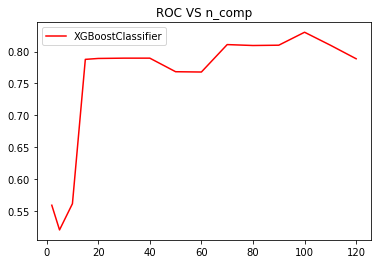




RandomForestClassifier | FR: PCA

[00:28:15] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.5586575408261287 when Principal components (features) are 2



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1041
           1       0.27      0.12      0.17        24

    accuracy                           0.97      1065
   macro avg       0.63      0.56      0.58      1065
weighted avg       0.96      0.97      0.97      1065

[00:28:15] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.5198727185398655 when Principal components (features) are 5



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           1       0.33      0.04      0.07        24

    accuracy                           0.98      1065
   macro avg       0.66      0.52      0.53      1065
weighted avg       0.96      0.98      0.97      1065

[00:28:15] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.5610590778097982 when Principal components (features) are 10



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           1       0.50      0.12      0.20        24

    accuracy                           0.98      1065
   macro avg       0.74      0.56      0.59      1065
weighted avg       0.97      0.98      0.97      1065

[00:28:16] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7878242074927955 when Principal components (features) are 15



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.64      0.58      0.61        24

    accuracy                           0.98      1065
   macro avg       0.81      0.79      0.80      1065
weighted avg       0.98      0.98      0.98      1065

[00:28:17] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7892651296829972 when Principal components (features) are 20



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.74      0.58      0.65        24

    accuracy                           0.99      1065
   macro avg       0.86      0.79      0.82      1065
weighted avg       0.98      0.99      0.99      1065

[00:28:17] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7897454370797311 when Principal components (features) are 30



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.78      0.58      0.67        24

    accuracy                           0.99      1065
   macro avg       0.88      0.79      0.83      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:18] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7897454370797311 when Principal components (features) are 40



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.78      0.58      0.67        24

    accuracy                           0.99      1065
   macro avg       0.88      0.79      0.83      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:19] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7684317963496636 when Principal components (features) are 50



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.72      0.54      0.62        24

    accuracy                           0.98      1065
   macro avg       0.86      0.77      0.81      1065
weighted avg       0.98      0.98      0.98      1065

[00:28:20] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7679514889529299 when Principal components (features) are 60



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.68      0.54      0.60        24

    accuracy                           0.98      1065
   macro avg       0.84      0.77      0.80      1065
weighted avg       0.98      0.98      0.98      1065

[00:28:21] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8110590778097982 when Principal components (features) are 70



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.83      0.62      0.71        24

    accuracy                           0.99      1065
   macro avg       0.91      0.81      0.85      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:22] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8096181556195966 when Principal components (features) are 80



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.71      0.62      0.67        24

    accuracy                           0.99      1065
   macro avg       0.85      0.81      0.83      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:23] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8100984630163304 when Principal components (features) are 90



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.75      0.62      0.68        24

    accuracy                           0.99      1065
   macro avg       0.87      0.81      0.84      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:24] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8304514889529299 when Principal components (features) are 100



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.73      0.67      0.70        24

    accuracy                           0.99      1065
   macro avg       0.86      0.83      0.84      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:25] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8100984630163304 when Principal components (features) are 110



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.75      0.62      0.68        24

    accuracy                           0.99      1065
   macro avg       0.87      0.81      0.84      1065
weighted avg       0.99      0.99      0.99      1065

[00:28:27] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.7887848222862633 when Principal components (features) are 120



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.70      0.58      0.64        24

    accuracy                           0.98      1065
   macro avg       0.85      0.79      0.81      1065
weighted avg       0.98      0.98      0.98      1065

    Features       ROC
0          2  0.558658
1          5  0.519873
2         10  0.561059
3         15  0.787824
4         20  0.789265
5         30  0.789745
6         40  0.789745
7         50  0.768432
8         60  0.767951
9         70  0.811059
10        80  0.809618
11        90  0.810098
12       100  0.830451
13       110  0.810098
14       120  0.788785


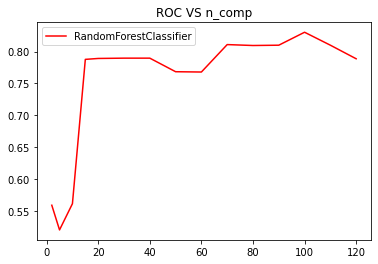




LogisticRegression | FR: PCA



ROC is 0.5 when Principal components (features) are 2



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           1       0.00      0.00      0.00        24

    accuracy                           0.98      1065
   macro avg       0.49      0.50      0.49      1065
weighted avg       0.96      0.98      0.97      1065



ROC is 0.5 when Principal components (features) are 5



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           1       0.00      0.00      0.00        24

    accuracy                           0.98      1065
   macro avg       0.49      0.50      0.49      1065
weighted avg       0.96      0.98      0.97      1065



ROC is 0.5407060518731988 when Principal components (features) are 10



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1041
           

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:




              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.61      0.46      0.52        24

    accuracy                           0.98      1065
   macro avg       0.80      0.73      0.76      1065
weighted avg       0.98      0.98      0.98      1065



ROC is 0.7461575408261287 when Principal components (features) are 40



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.60      0.50      0.55        24

    accuracy                           0.98      1065
   macro avg       0.79      0.75      0.77      1065
weighted avg       0.98      0.98      0.98      1065



ROC is 0.7461575408261287 when Principal components (features) are 50



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.60      0.50      0.55        24

    accuracy                 

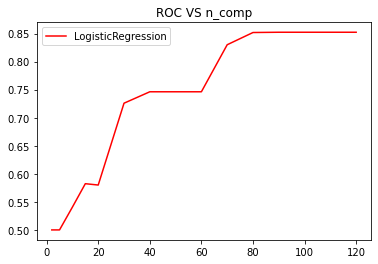

In [437]:
print("\n\n\nXGBClassifier | FR: PCA\n")
pca_features_list_c_xgb, acc_list_c_xgb = XGBoost_pca(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca)
plt.plot(pca_features_list_c_xgb, acc_list_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: PCA\n")
pca_features_list_c_rf, acc_list_c_rf = XGBoost_pca(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca)
plt.plot(pca_features_list_c_rf, acc_list_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: PCA\n")
pca_features_list_c_logreg, acc_list_c_logreg = logreg_pca(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca)
plt.plot(pca_features_list_c_logreg, acc_list_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

# LDA

In [371]:
def LDA_(data):
    
  class_feature_means = pd.DataFrame(columns=np.unique(data['in_hospital_mortality'])) # create an empty dataframe with columns equal to number of classes of the dataset
  '''the loop below groups the scaled dataframe by the class_ variable and take means of the rows for each class. This is done to scatter_matrices'''
  for c, rows in data.groupby('in_hospital_mortality'):
    class_feature_means[c] = rows.mean()
  new = class_feature_means.iloc[0:-1,:] # a new dataframe having columns as number of classes and rows as number of features where each row has the mean for the particular class

  within_class_scatter_matrix = np.zeros((len(data.columns)-1,len(data.columns)-1)) # initialize an empty dataframe
  for c, rows in data.groupby('in_hospital_mortality'):
    rows = rows.drop(['in_hospital_mortality'], axis=1)
    s = np.zeros((len(data.columns)-1,len(data.columns)-1))
  #print(rows)
    for index, row in rows.iterrows():
      x, mc = row.values.reshape(len(data.columns)-1,1), new[c].values.reshape(len(data.columns)-1,1)
      s += (x - mc).dot((x - mc).T)
      within_class_scatter_matrix += s

  feature_means = data.iloc[0:,0:len(data.columns)-1].mean()
  between_class = np.zeros((len(data.columns)-1,len(data.columns)-1))
  for c in new:
    n = len(data.loc[data['in_hospital_mortality'] == c].index)
    mc , m = new[c].values.reshape(len(data.columns)-1,1), feature_means.values.reshape(len(data.columns)-1,1)
    between_class += n *  (mc - m).dot((mc - m).T) 

  eigen_val, eigen_vec = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class))
  pairs = [(np.abs(eigen_val[i]),eigen_vec[:,i]) for i in range(len(eigen_val))]
  pairs = sorted(pairs, key= lambda x:x[0], reverse = True)

  n_comp = [2,4,6,10,20,50,60,70,80,100,120]
  
  pairs_df = pd.DataFrame(pairs)
  lda_df = pd.DataFrame()
  lda_df_list = []
  for j in tqdm(n_comp, desc = 'Applying LDA for different values of Linear Discriminants'):
    lda_df = pd.DataFrame()
    for i in range(0,j):
      lda_mat = pairs_df.iloc[0:j,-1].values[i]
      lda_mat = [x.real for x in lda_mat]
      lda_mat = pd.DataFrame(lda_mat)
      lda_df= pd.concat([lda_df,lda_mat],axis = 1)
    data_lda = data.iloc[0:,0:len(data.columns)-1].values.dot(lda_df.values)
    data_lda = pd.DataFrame(data_lda)
    lda_df_list.append(data_lda)

  X_train_lda_list = []
  X_test_lda_list = []
  for i in range(0,len(n_comp)):
    data_X = lda_df_list[i] 
    data_Y=  data.iloc[:,len(data.columns)-1]
    X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)
    X_train_lda_list.append(X_train)
    X_test_lda_list.append(X_test)
  return(X_train_lda_list, X_test_lda_list, Y_train, Y_test, n_comp)

X_train_lda_list, X_test_lda_list, Y_train, Y_test, n_comp = LDA_(df0)

LinAlgError: Singular matrix

# L1

In [429]:
def lasso_(data):

  data_X = data.iloc[:,0:len(data.columns)-1] 
  data_Y=  data.iloc[:,len(data.columns)-1]
  names = data.columns
  X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)


  alpha_list = [0.009,0.01,0.03,0.05,0.09,0.1,0.3,0.5,0.8,1.6,2,5,100]

  #alpha_list = [0.005,0.004, 0.002, 0.001,0.0009, 0.0005,  0.00001 ]

  #alpha_list = [1.5, 1, 0.5, 0.4, 0.2, 0.15, 0.1, 0.05, 0.005,1e-10]

  #alpha_list = [0.012, 0.00018, 0.0001, 0.00008,  0.00007, 0.00006, 0.00005, 0.00004,0.00002,0.00001, 1e-6]

  #alpha_list = [5, 1.8, 0.0001, 1, 0.9,0.3,0.18,0.1,0.05,0.01,0.0001]

  X_train_lasso_list = []
  X_test_lasso_list = []
  n_comp_lasso = []

  for alpha in tqdm(alpha_list, desc = 'Running Lasso on different Values of alpha:'):
    lasso = SelectFromModel(LogisticRegression(C= alpha, penalty='l1', solver = 'saga', max_iter=100000))
    lasso.fit(X_train, Y_train)
    rm_features = len(X_train.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()])   
    n_comp_lasso.append(len(X_train.columns)-rm_features)
    X_train_lasso = lasso.transform(X_train)
    X_test_lasso = lasso.transform(X_test)
    X_train_lasso_list.append(X_train_lasso)
    X_test_lasso_list.append(X_test_lasso)

  #if d_input == 2 or d_input == 3 or d_input == 4 or d_input == 5:

    #for alpha in tqdm(alpha_list, desc = 'Running Lasso on different Values of alpha:'):
      #lasso = Lasso(alpha = alpha, max_iter= 100000) 
      #lasso.fit(X_train_scaled, Y_train)
      #rm_features = len(X_train.columns[(lasso.coef_ == 0).ravel().tolist()])
      #n_comp_lasso.append(len(X_train.columns)-rm_features)
      #X_train_scaled_lasso = pd.DataFrame(X_train_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_test_scaled_lasso = pd.DataFrame(X_test_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_train_scaled_lasso_list.append(X_train_scaled_lasso)
      #X_test_scaled_lasso_list.append(X_test_scaled_lasso)   
  return(X_train_lasso_list, X_test_lasso_list, n_comp_lasso, Y_train, Y_test)

X_train_lasso_list, X_test_lasso_list, n_comp_lasso, Y_train_lasso, Y_test_lasso = lasso_(df0)

Running Lasso on different Values of alpha:: 100%|██████████| 13/13 [11:10<00:00, 51.58s/it]


In [376]:
n_comp_lasso

[13, 13, 36, 51, 59, 60, 88, 97, 101, 106, 109, 113, 118]




XGBClassifier | FR: L1

[14:11:24] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956937479669754  when Features are 44



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:24] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9961703923902355  when Features are 47



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:25] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947569113441374  when Features are 69



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[14:11:26] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 75



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:27] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9937871702739343  when Features are 87



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[14:11:28] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9937871702739343  when Features are 88



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[14:11:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9957102001906577  when Features are 104



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:30] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 107



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 110



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:32] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 115



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:33] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 116



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:35] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 117



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:11:36] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 119



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

    Features       ROC
0         44  0.995694
1         47  0.996170
2         69  0.994757
3         75  0.995234
4         87  0.993787
5         88  0.993787
6        104  0.995710
7        107  0.995234
8        110  0.995234
9        115  0.995234
10       116  0.995234
11       117  0.995234
12       119  0.995234


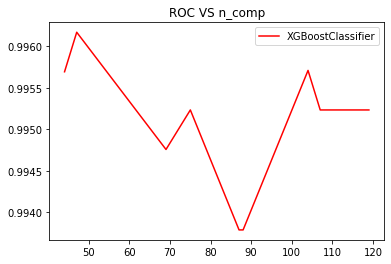




RandomForestClassifier | FR: L1



Accuracy is 0.9942638146971945 when Features are 44



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



Accuracy is 0.993310525850674 when Features are 47



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



Accuracy is 0.9942638146971945 when Features are 69



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.

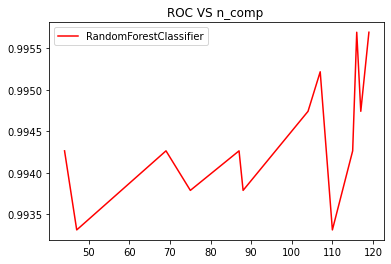




LogisticRegression | FR: L1



ROC is 0.9816736330082374 when Features are 44



              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1049
           1       0.98      0.99      0.98      1014

    accuracy                           0.98      2063
   macro avg       0.98      0.98      0.98      2063
weighted avg       0.98      0.98      0.98      2063



ROC is 0.985536145065367 when Features are 47



              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1049
           1       0.98      0.99      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



ROC is 0.9855525972890498 when Features are 69



              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1049
           1       0.98      0.99      0.99      1

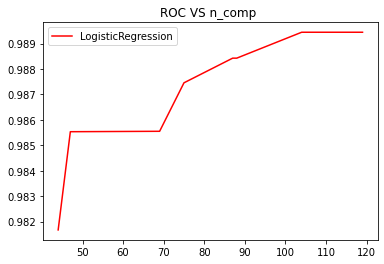

In [559]:
print("\n\n\nXGBClassifier | FR: L1\n")
n_comp_lasso_c_xgb, acc_list_lasso_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_lasso_list, X_test_lasso_list, Y_train_lasso, Y_test_lasso, n_comp_lasso)
plt.plot(n_comp_lasso_c_xgb, acc_list_lasso_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: L1\n")
n_comp_lasso_c_rf, acc_list_lasso_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_lasso_list, X_test_lasso_list, Y_train_lasso, Y_test_lasso, n_comp_lasso)
plt.plot(n_comp_lasso_c_rf, acc_list_lasso_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: L1\n")
n_comp_lasso_c_logreg, acc_list_lasso_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_lasso_list, X_test_lasso_list, Y_train_lasso, Y_test_lasso, n_comp_lasso)
plt.plot(n_comp_lasso_c_logreg, acc_list_lasso_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

# L2

In [426]:
def ridge(data):

  data_X = data.iloc[:,0:len(data.columns)-1] 
  data_Y=  data.iloc[:,len(data.columns)-1]
  names = data.columns
  X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)


  alpha_list = [10000]

  #alpha_list = [0.005,0.004, 0.002, 0.001,0.0009, 0.0005,  0.00001 ]

  #alpha_list = [1.5, 1, 0.5, 0.4, 0.2, 0.15, 0.1, 0.05, 0.005,1e-10]

  #alpha_list = [0.012, 0.00018, 0.0001, 0.00008,  0.00007, 0.00006, 0.00005, 0.00004,0.00002,0.00001, 1e-6]

  #alpha_list = [5, 1.8, 0.0001, 1, 0.9,0.3,0.18,0.1,0.05,0.01,0.0001]

  X_train_ridge_list = []
  X_test_ridge_list = []
  n_comp_ridge = []

  for alpha in tqdm(alpha_list, desc = 'Running Ridge on different Values of alpha:'):
    ridge = SelectFromModel(LogisticRegression(C= alpha, penalty='l2', solver = 'saga', max_iter=100000))
    ridge.fit(X_train, Y_train)
    rm_features = len(X_train.columns[(ridge.estimator_.coef_ == 0).ravel().tolist()])   
    n_comp_ridge.append(len(X_train.columns)-rm_features)
    X_train_ridge = ridge.transform(X_train)
    X_test_ridge = ridge.transform(X_test)
    X_train_ridge_list.append(X_train_ridge)
    X_test_ridge_list.append(X_test_ridge)

  #if d_input == 2 or d_input == 3 or d_input == 4 or d_input == 5:

    #for alpha in tqdm(alpha_list, desc = 'Running Lasso on different Values of alpha:'):
      #lasso = Lasso(alpha = alpha, max_iter= 100000) 
      #lasso.fit(X_train_scaled, Y_train)
      #rm_features = len(X_train.columns[(lasso.coef_ == 0).ravel().tolist()])
      #n_comp_lasso.append(len(X_train.columns)-rm_features)
      #X_train_scaled_lasso = pd.DataFrame(X_train_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_test_scaled_lasso = pd.DataFrame(X_test_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_train_scaled_lasso_list.append(X_train_scaled_lasso)
      #X_test_scaled_lasso_list.append(X_test_scaled_lasso)   
  return(X_train_ridge_list, X_test_ridge_list, n_comp_ridge, Y_train, Y_test)

X_train_ridge_list, X_test_ridge_list, n_comp_ridge, Y_train_ridge, Y_test_ridge = ridge(df0)

Running Ridge on different Values of alpha:: 100%|██████████| 1/1 [00:35<00:00, 35.42s/it]


In [425]:
n_comp_ridge

[118, 118]

In [428]:
print("\n\n\nXGBClassifier | FR: L2\n")
n_comp_ridge_c_xgb, acc_list_ridge_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_ridge_list, X_test_ridge_list, Y_train_ridge, Y_test_ridge, n_comp_ridge)


print("\n\n\nRandomForestClassifier | FR: L2\n")
n_comp_ridge_c_rf, acc_list_ridge_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_ridge_list, X_test_ridge_list, Y_train_ridge, Y_test_ridge, n_comp_ridge)


print("\n\n\nLogisticRegression | FR: L2\n")
n_comp_ridge_c_logreg, acc_list_ridge_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_ridge_list, X_test_ridge_list, Y_train_ridge, Y_test_ridge, n_comp_ridge)





XGBClassifier | FR: L2

[23:53:25] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8934317963496637  when Features are 118



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.79      0.79      0.79        24

    accuracy                           0.99      1065
   macro avg       0.89      0.89      0.89      1065
weighted avg       0.99      0.99      0.99      1065

   Features       ROC
0       118  0.893432



RandomForestClassifier | FR: L2



Accuracy is 0.8517651296829971 when Features are 118



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.77      0.71      0.74        24

    accuracy                           0.99      1065
   macro avg       0.88      0.85      0.87      1065
weighted avg       0.99      0.99      0.99      1065

   Features       ROC
0       118  0.851765



LogisticRegression | FR: L2



ROC is 0.829490874159462 when Features are 118



              precision   

# XGB

In [419]:
def XGB_(data):

  data_X = data.iloc[:,0:len(data.columns)-1] 
  data_Y=  data.iloc[:,len(data.columns)-1]
  names = data.columns
  X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.06 ,random_state=42)  

  threshold_list = [0.02,0.005,0.0005,0.00005,0.000005,0]


  X_train_xgb_list = []
  X_test_xgb_list = []
  n_comp_xgb = []

  for thr in tqdm(threshold_list, desc = 'Running XGB on different Thresholds:' ):
    xgb = SelectFromModel(XGBClassifier(n_estimators = 1000, use_label_encoder = False), threshold=thr )
    xgb.fit(X_train.values, Y_train.values)
    selected_feat= len(X_train.columns[(xgb.get_support())])
    n_comp_xgb.append(selected_feat)
    X_train_xgb = xgb.transform(X_train)
    X_test_xgb = xgb.transform(X_test)
    X_train_xgb_list.append(X_train_xgb)
    X_test_xgb_list.append(X_test_xgb)

  return(X_train_xgb_list, X_test_xgb_list, n_comp_xgb, Y_train, Y_test)

X_train_xgb_list, X_test_xgb_list, n_comp_xgb, Y_train_xgb, Y_test_xgb = XGB_(df0)

Running XGB on different Thresholds::   0%|          | 0/6 [00:00<?, ?it/s]

[23:37:02] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  17%|█▋        | 1/6 [00:03<00:15,  3.15s/it]

[23:37:05] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  33%|███▎      | 2/6 [00:06<00:12,  3.19s/it]

[23:37:08] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  50%|█████     | 3/6 [00:09<00:09,  3.20s/it]

[23:37:11] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  67%|██████▋   | 4/6 [00:12<00:06,  3.22s/it]

[23:37:15] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  83%|████████▎ | 5/6 [00:16<00:03,  3.24s/it]

[23:37:18] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds:: 100%|██████████| 6/6 [00:19<00:00,  3.25s/it]





XGBClassifier | FR: XGB

[23:38:48] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9150743099787686  when Features are 11



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       0.83      0.83      0.83         6

    accuracy                           0.99       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.99      0.99      0.99       320

[23:38:48] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8333333333333333  when Features are 33



              precision    recall  f1-score   support

           0       0.99      1.00      1.00       314
           1       1.00      0.67      0.80         6

    accuracy                           0.99       320
   macro avg       1.00      0.83      0.90       320
weighted avg       0.99      0.99      0.99       320

[23:38:48] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9166666666666667  when Features are 50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      0.83      0.91         6

    accuracy                           1.00       320
   macro avg       1.00      0.92      0.95       320
weighted avg       1.00      1.00      1.00       320

[23:38:49] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9166666666666667  when Features are 53



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      0.83      0.91         6

    accuracy                           1.00       320
   macro avg       1.00      0.92      0.95       320
weighted avg       1.00      1.00      1.00       320

[23:38:49] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9166666666666667  when Features are 54



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      0.83      0.91         6

    accuracy                           1.00       320
   macro avg       1.00      0.92      0.95       320
weighted avg       1.00      1.00      1.00       320

[23:38:49] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9166666666666667  when Features are 120



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      0.83      0.91         6

    accuracy                           1.00       320
   macro avg       1.00      0.92      0.95       320
weighted avg       1.00      1.00      1.00       320

   Features       ROC
0        11  0.915074
1        33  0.833333
2        50  0.916667
3        53  0.916667
4        54  0.916667
5       120  0.916667


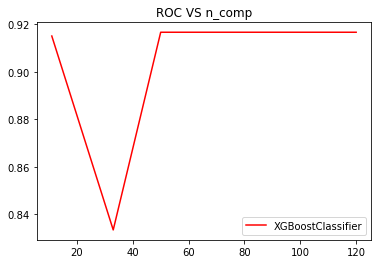




RandomForestClassifier | FR: XGB



Accuracy is 0.8317409766454352 when Features are 11



              precision    recall  f1-score   support

           0       0.99      1.00      1.00       314
           1       0.80      0.67      0.73         6

    accuracy                           0.99       320
   macro avg       0.90      0.83      0.86       320
weighted avg       0.99      0.99      0.99       320



Accuracy is 0.9166666666666667 when Features are 33



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      0.83      0.91         6

    accuracy                           1.00       320
   macro avg       1.00      0.92      0.95       320
weighted avg       1.00      1.00      1.00       320



Accuracy is 0.9166666666666667 when Features are 50



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      

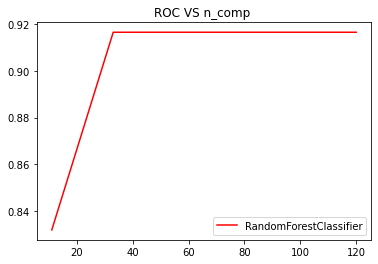




LogisticRegression | FR: XGB



ROC is 0.8333333333333333 when Features are 11



              precision    recall  f1-score   support

           0       0.99      1.00      1.00       314
           1       1.00      0.67      0.80         6

    accuracy                           0.99       320
   macro avg       1.00      0.83      0.90       320
weighted avg       0.99      0.99      0.99       320



ROC is 0.8333333333333333 when Features are 33



              precision    recall  f1-score   support

           0       0.99      1.00      1.00       314
           1       1.00      0.67      0.80         6

    accuracy                           0.99       320
   macro avg       1.00      0.83      0.90       320
weighted avg       0.99      0.99      0.99       320



ROC is 0.8333333333333333 when Features are 50



              precision    recall  f1-score   support

           0       0.99      1.00      1.00       314
           1       1.00      0.67      0.80     

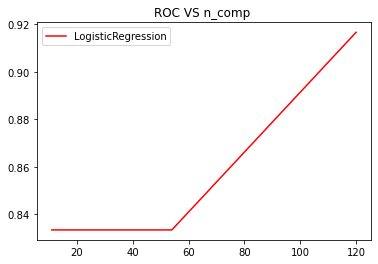

In [421]:
print("\n\n\nXGBClassifier | FR: XGB\n")
n_comp_xgb_c_xgb, acc_list_xgb_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_xgb_list, X_test_xgb_list, Y_train_xgb, Y_test_xgb, n_comp_xgb)
plt.plot(n_comp_xgb_c_xgb, acc_list_xgb_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: XGB\n")
n_comp_xgb_c_rf, acc_list_xgb_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_xgb_list, X_test_xgb_list, Y_train_xgb, Y_test_xgb, n_comp_xgb)
plt.plot(n_comp_xgb_c_rf, acc_list_xgb_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: XGB\n")
n_comp_xgb_c_logreg, acc_list_xgb_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_xgb_list, X_test_xgb_list, Y_train_xgb, Y_test_xgb, n_comp_xgb)
plt.plot(n_comp_xgb_c_logreg, acc_list_xgb_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

# RF

In [410]:
def RF_(data):

  data_X = data.iloc[:,0:len(data.columns)-1] 
  data_Y=  data.iloc[:,len(data.columns)-1]
  names = data.columns
  X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)


  threshold_list = [0.009,0.007,0.006,0.005,0.004,0.003,0.002,0.0008,0.0005, 0.0003, 0.0001, 1e-20, 1e-50, 0]                                                                                                                                                                  


  X_train_rf_list = []
  X_test_rf_list = []
  n_comp_rf = []

  for thr in tqdm(threshold_list, desc = 'Running RF on different Thresholds:' ):
    rf = SelectFromModel(RandomForestClassifier(n_estimators = 1000), threshold=thr )
    rf.fit(X_train, Y_train)
    selected_feat= len(X_train.columns[(rf.get_support())])
    n_comp_rf.append(selected_feat)
    X_train_rf = rf.transform(X_train)
    X_test_rf = rf.transform(X_test)
    X_train_rf_list.append(X_train_rf)
    X_test_rf_list.append(X_test_rf)  

  return(X_train_rf_list, X_test_rf_list, n_comp_rf, Y_train, Y_test)

X_train_rf_list, X_test_rf_list, n_comp_rf, Y_train_rf, Y_test_rf = RF_(df0)

Running RF on different Thresholds:: 100%|██████████| 14/14 [01:05<00:00,  4.68s/it]





XGBClassifier | FR: RF

[23:30:27] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9336575408261287  when Features are 25



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1041
           1       0.72      0.88      0.79        24

    accuracy                           0.99      1065
   macro avg       0.86      0.93      0.89      1065
weighted avg       0.99      0.99      0.99      1065

[23:30:27] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9341378482228626  when Features are 31



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1041
           1       0.75      0.88      0.81        24

    accuracy                           0.99      1065
   macro avg       0.87      0.93      0.90      1065
weighted avg       0.99      0.99      0.99      1065

[23:30:27] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9341378482228626  when Features are 31



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1041
           1       0.75      0.88      0.81        24

    accuracy                           0.99      1065
   macro avg       0.87      0.93      0.90      1065
weighted avg       0.99      0.99      0.99      1065

[23:30:27] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9346181556195965  when Features are 36



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1041
           1       0.78      0.88      0.82        24

    accuracy                           0.99      1065
   macro avg       0.89      0.93      0.91      1065
weighted avg       0.99      0.99      0.99      1065

[23:30:28] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9346181556195965  when Features are 44



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1041
           1       0.78      0.88      0.82        24

    accuracy                           0.99      1065
   macro avg       0.89      0.93      0.91      1065
weighted avg       0.99      0.99      0.99      1065

[23:30:28] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9564121037463976  when Features are 52



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.85      0.92      0.88        24

    accuracy                           0.99      1065
   macro avg       0.92      0.96      0.94      1065
weighted avg       0.99      0.99      0.99      1065

[23:30:28] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9355787704130644  when Features are 67



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.84      0.88      0.86        24

    accuracy                           0.99      1065
   macro avg       0.92      0.94      0.93      1065
weighted avg       0.99      0.99      0.99      1065

[23:30:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9568924111431315  when Features are 92



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.88      0.92      0.90        24

    accuracy                           1.00      1065
   macro avg       0.94      0.96      0.95      1065
weighted avg       1.00      1.00      1.00      1065

[23:30:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9568924111431315  when Features are 99



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.88      0.92      0.90        24

    accuracy                           1.00      1065
   macro avg       0.94      0.96      0.95      1065
weighted avg       1.00      1.00      1.00      1065

[23:30:30] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9568924111431315  when Features are 99



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.88      0.92      0.90        24

    accuracy                           1.00      1065
   macro avg       0.94      0.96      0.95      1065
weighted avg       1.00      1.00      1.00      1065

[23:30:30] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9568924111431315  when Features are 104



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.88      0.92      0.90        24

    accuracy                           1.00      1065
   macro avg       0.94      0.96      0.95      1065
weighted avg       1.00      1.00      1.00      1065

[23:30:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9568924111431315  when Features are 112



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.88      0.92      0.90        24

    accuracy                           1.00      1065
   macro avg       0.94      0.96      0.95      1065
weighted avg       1.00      1.00      1.00      1065

[23:30:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9568924111431315  when Features are 113



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.88      0.92      0.90        24

    accuracy                           1.00      1065
   macro avg       0.94      0.96      0.95      1065
weighted avg       1.00      1.00      1.00      1065

[23:30:32] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9568924111431315  when Features are 120



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.88      0.92      0.90        24

    accuracy                           1.00      1065
   macro avg       0.94      0.96      0.95      1065
weighted avg       1.00      1.00      1.00      1065

    Features       ROC
0         25  0.933658
1         31  0.934138
3         36  0.934618
4         44  0.934618
5         52  0.956412
6         67  0.935579
7         92  0.956892
8         99  0.956892
10       104  0.956892
11       112  0.956892
12       113  0.956892
13       120  0.956892


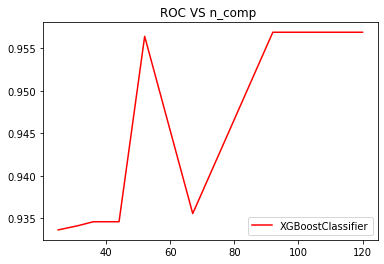




RandomForestClassifier | FR: RF



Accuracy is 0.9142651296829971 when Features are 25



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.80      0.83      0.82        24

    accuracy                           0.99      1065
   macro avg       0.90      0.91      0.91      1065
weighted avg       0.99      0.99      0.99      1065



Accuracy is 0.9147454370797311 when Features are 31



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       0.83      0.83      0.83        24

    accuracy                           0.99      1065
   macro avg       0.91      0.91      0.91      1065
weighted avg       0.99      0.99      0.99      1065



Accuracy is 0.9133045148895294 when Features are 31



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1041
           1       0.74      0

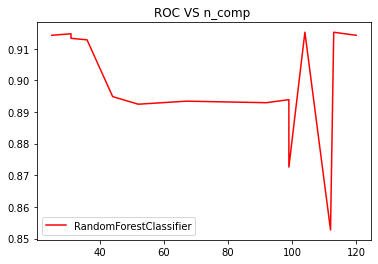




LogisticRegression | FR: RF



ROC is 0.8100984630163304 when Features are 25



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.75      0.62      0.68        24

    accuracy                           0.99      1065
   macro avg       0.87      0.81      0.84      1065
weighted avg       0.99      0.99      0.99      1065



ROC is 0.8105787704130644 when Features are 31



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.79      0.62      0.70        24

    accuracy                           0.99      1065
   macro avg       0.89      0.81      0.85      1065
weighted avg       0.99      0.99      0.99      1065



ROC is 0.8105787704130644 when Features are 31



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       0.79      0.62      0.70      

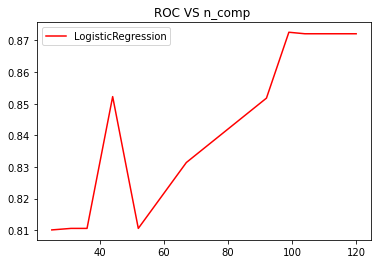

In [418]:
print("\n\n\nXGBClassifier | FR: RF\n")
n_comp_rf_c_xgb, acc_list_rf_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_rf_list, X_test_rf_list, Y_train_rf, Y_test_rf, n_comp_rf)
plt.plot(n_comp_rf_c_xgb, acc_list_rf_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: RF\n")
n_comp_rf_c_rf, acc_list_rf_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_rf_list, X_test_rf_list, Y_train_rf, Y_test_rf, n_comp_rf)
plt.plot(n_comp_rf_c_rf, acc_list_rf_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: RF\n")
n_comp_rf_c_logreg, acc_list_rf_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_rf_list, X_test_rf_list, Y_train_rf, Y_test_rf, n_comp_rf)
plt.plot(n_comp_rf_c_logreg, acc_list_rf_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

# Feature Selection (Balanced Data)

# PCA

In [439]:
def pca_(data):

    
  data_X = data.iloc[:,0:len(data.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y=  data.iloc[:,len(data.columns)-1] # target variable only
  oversample = SMOTE()
  X, y = oversample.fit_resample(data_X, data_Y)
  X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42) # split  

  pca_list = [2,5,10,15,20,30,40,50,60,70,80,90,100,110,120] # variance list on the basis of which features would be automatically selected

  
  X_train_pca_list = [] # empty list to store all different training samples which are dimensionally reduced by PCA (each training sample has different features)
  X_test_pca_list = [] # PCa transformed testing samples each having different number of features
  pca_features_list = [] # list to store number of features selected by pca
  pca_var_explained = [] # list to store the variance

  '''iteratively pick a value from pca_list and provides it to PCA method to transform the training and testing sets. that way you will have 11 different training
      and testing samples each having different number of features'''
    
  for p in tqdm(pca_list, desc = 'Applying PCA for different values of Principal Componenets'):
    pca = PCA(p,svd_solver='full') # pca method
    pca.fit(X_train) # fit on training sample
    #print()
    X_train_pca = pca.transform(X_train) # transform training set
    X_test_pca = pca.transform(X_test) # transform testing set
    X_train_pca_list.append(X_train_pca) # append the transformed training set to a list
    X_test_pca_list.append(X_test_pca) # append transformed testing set to a list
    pca_features_list.append(pca.n_components_) # append features
    pca_var_explained.append(pca.n_components) # append variance
    
  return(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train, Y_test)

X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca = pca_(df0)



Applying PCA for different values of Principal Componenets: 100%|██████████| 15/15 [00:01<00:00, 12.91it/s]





XGBClassifier | FR: PCA

[00:43:59] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8701085307503792 when Principal components (features) are 2



              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1045
           1       0.90      0.83      0.86      1025

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

[00:44:00] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.96614307387093 when Principal components (features) are 5



              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1045
           1       0.97      0.96      0.97      1025

    accuracy                           0.97      2070
   macro avg       0.97      0.97      0.97      2070
weighted avg       0.97      0.97      0.97      2070

[00:44:02] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9918380207725522 when Principal components (features) are 10



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956657719687245 when Principal components (features) are 15



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:04] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 20



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:05] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 30



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:07] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9961535768467733 when Principal components (features) are 40



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:08] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956844439257789 when Principal components (features) are 50



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:10] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952059750262575 when Principal components (features) are 60



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:12] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952059750262575 when Principal components (features) are 70



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:15] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956844439257789 when Principal components (features) are 80



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:18] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947088341696815 when Principal components (features) are 90



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:21] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 100



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:24] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 110



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:28] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956844439257789 when Principal components (features) are 120



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

    Features       ROC
0          2  0.870109
1          5  0.966143
2         10  0.991838
3         15  0.995666
4         20  0.994718
5         30  0.994718
6         40  0.996154
7         50  0.995684
8         60  0.995206
9         70  0.995206
10        80  0.995684
11        90  0.994709
12       100  0.994718
13       110  0.994718
14       120  0.995684


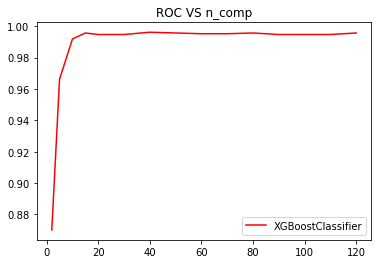




RandomForestClassifier | FR: PCA

[00:44:32] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.8701085307503792 when Principal components (features) are 2



              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1045
           1       0.90      0.83      0.86      1025

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

[00:44:33] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.96614307387093 when Principal components (features) are 5



              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1045
           1       0.97      0.96      0.97      1025

    accuracy                           0.97      2070
   macro avg       0.97      0.97      0.97      2070
weighted avg       0.97      0.97      0.97      2070

[00:44:34] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9918380207725522 when Principal components (features) are 10



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:35] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956657719687245 when Principal components (features) are 15



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:36] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 20



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:36] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 30



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:38] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9961535768467733 when Principal components (features) are 40



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:39] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956844439257789 when Principal components (features) are 50



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:41] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952059750262575 when Principal components (features) are 60



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:44] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952059750262575 when Principal components (features) are 70



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:46] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956844439257789 when Principal components (features) are 80



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[00:44:49] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947088341696815 when Principal components (features) are 90



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:53] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 100



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070

[00:44:56] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947181701482087 when Principal components (features) are 110



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1045
           1       0.99      1.00      0.99      1025

    accuracy                           0.99      2070
   macro avg       0.99      0.99      0.99      2070
weighted avg       0.99      0.99      0.99      2070



D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:00] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC is 0.9956844439257789 when Principal components (features) are 120



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

    Features       ROC
0          2  0.870109
1          5  0.966143
2         10  0.991838
3         15  0.995666
4         20  0.994718
5         30  0.994718
6         40  0.996154
7         50  0.995684
8         60  0.995206
9         70  0.995206
10        80  0.995684
11        90  0.994709
12       

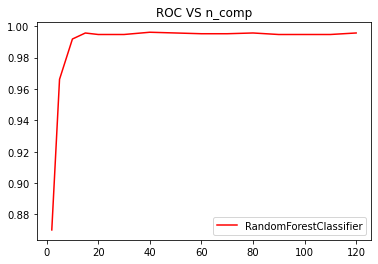




LogisticRegression | FR: PCA



ROC is 0.5103325942350333 when Principal components (features) are 2



              precision    recall  f1-score   support

           0       0.52      0.49      0.50      1045
           1       0.51      0.53      0.52      1025

    accuracy                           0.51      2070
   macro avg       0.51      0.51      0.51      2070
weighted avg       0.51      0.51      0.51      2070



ROC is 0.6484840704866379 when Principal components (features) are 5



              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1045
           1       0.65      0.62      0.63      1025

    accuracy                           0.65      2070
   macro avg       0.65      0.65      0.65      2070
weighted avg       0.65      0.65      0.65      2070



ROC is 0.9410106196755746 when Principal components (features) are 10



              precision    recall  f1-score   support

           0       0.94      0.95  

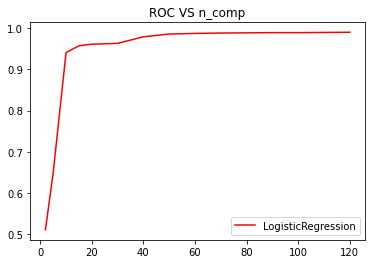

In [440]:
print("\n\n\nXGBClassifier | FR: PCA\n")
pca_features_list_c_xgb, acc_list_c_xgb = XGBoost_pca(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca)
plt.plot(pca_features_list_c_xgb, acc_list_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: PCA\n")
pca_features_list_c_rf, acc_list_c_rf = XGBoost_pca(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca)
plt.plot(pca_features_list_c_rf, acc_list_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: PCA\n")
pca_features_list_c_logreg, acc_list_c_logreg = logreg_pca(X_train_pca_list, X_test_pca_list, pca_features_list, pca_var_explained, Y_train_pca, Y_test_pca)
plt.plot(pca_features_list_c_logreg, acc_list_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

# L1

In [553]:
def lasso_(data):

    
  names = data.columns
  data_X = data.iloc[:,0:len(data.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y=  data.iloc[:,len(data.columns)-1] # target variable only
  oversample = SMOTE()
  X, y = oversample.fit_resample(data_X, data_Y)
  X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42) # split  


  alpha_list = [0.009,0.01,0.03,0.05,0.09,0.1,0.3,0.5,0.8,1.6,2,5,100]

  #alpha_list = [0.005,0.004, 0.002, 0.001,0.0009, 0.0005,  0.00001 ]

  #alpha_list = [1.5, 1, 0.5, 0.4, 0.2, 0.15, 0.1, 0.05, 0.005,1e-10]

  #alpha_list = [0.012, 0.00018, 0.0001, 0.00008,  0.00007, 0.00006, 0.00005, 0.00004,0.00002,0.00001, 1e-6]

  #alpha_list = [5, 1.8, 0.0001, 1, 0.9,0.3,0.18,0.1,0.05,0.01,0.0001]

  X_train_lasso_list = []
  X_test_lasso_list = []
  n_comp_lasso = []

  for alpha in tqdm(alpha_list, desc = 'Running Lasso on different Values of alpha:'):
    lasso = SelectFromModel(LogisticRegression(C= alpha, penalty='l1', solver = 'saga', max_iter=100000))
    lasso.fit(X_train, Y_train)
    rm_features = len(X_train.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()])   
    n_comp_lasso.append(len(X_train.columns)-rm_features)
    X_train_lasso = lasso.transform(X_train)
    X_test_lasso = lasso.transform(X_test)
    X_train_lasso_list.append(X_train_lasso)
    X_test_lasso_list.append(X_test_lasso)

  #if d_input == 2 or d_input == 3 or d_input == 4 or d_input == 5:

    #for alpha in tqdm(alpha_list, desc = 'Running Lasso on different Values of alpha:'):
      #lasso = Lasso(alpha = alpha, max_iter= 100000) 
      #lasso.fit(X_train_scaled, Y_train)
      #rm_features = len(X_train.columns[(lasso.coef_ == 0).ravel().tolist()])
      #n_comp_lasso.append(len(X_train.columns)-rm_features)
      #X_train_scaled_lasso = pd.DataFrame(X_train_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_test_scaled_lasso = pd.DataFrame(X_test_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_train_scaled_lasso_list.append(X_train_scaled_lasso)
      #X_test_scaled_lasso_list.append(X_test_scaled_lasso)   
  return(X_train_lasso_list, X_test_lasso_list, n_comp_lasso, Y_train, Y_test)

X_train_lasso_list, X_test_lasso_list, n_comp_lasso, Y_train_lasso, Y_test_lasso = lasso_(df0)

Running Lasso on different Values of alpha:: 100%|██████████| 13/13 [19:04<00:00, 88.08s/it]





XGBClassifier | FR: L1

[22:08:23] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956937479669754  when Features are 44



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:23] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9961703923902355  when Features are 47



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:24] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9947569113441374  when Features are 69



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[22:08:25] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 75



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:26] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9937871702739343  when Features are 87



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[22:08:27] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9937871702739343  when Features are 88



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[22:08:28] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9957102001906577  when Features are 104



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 107



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:30] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 110



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 115



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:33] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 116



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:34] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 117



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[22:08:35] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952335557673976  when Features are 119



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

    Features       ROC
0         44  0.995694
1         47  0.996170
2         69  0.994757
3         75  0.995234
4         87  0.993787
5         88  0.993787
6        104  0.995710
7        107  0.995234
8        110  0.995234
9        115  0.995234
10       116  0.995234
11       117  0.995234
12       119  0.995234


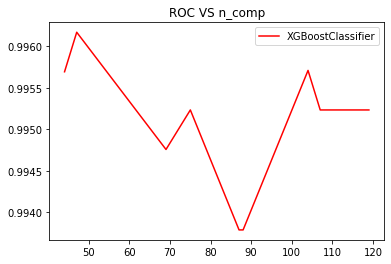




RandomForestClassifier | FR: L1



Accuracy is 0.9947404591204547 when Features are 44



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



Accuracy is 0.993310525850674 when Features are 47



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



Accuracy is 0.9918805925808932 when Features are 69



              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1049
           1       0.98      1.

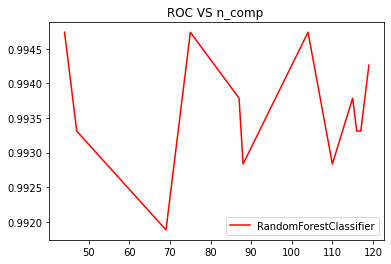




LogisticRegression | FR: L1



ROC is 0.9816736330082374 when Features are 44



              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1049
           1       0.98      0.99      0.98      1014

    accuracy                           0.98      2063
   macro avg       0.98      0.98      0.98      2063
weighted avg       0.98      0.98      0.98      2063



ROC is 0.985536145065367 when Features are 47



              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1049
           1       0.98      0.99      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



ROC is 0.9855525972890498 when Features are 69



              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1049
           1       0.98      0.99      0.99      1

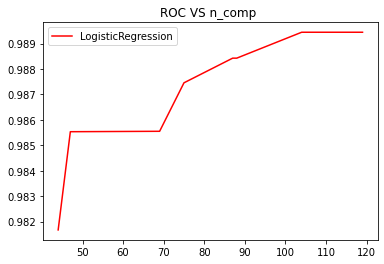

In [554]:
print("\n\n\nXGBClassifier | FR: L1\n")
n_comp_lasso_c_xgb, acc_list_lasso_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_lasso_list, X_test_lasso_list, Y_train_lasso, Y_test_lasso, n_comp_lasso)
plt.plot(n_comp_lasso_c_xgb, acc_list_lasso_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: L1\n")
n_comp_lasso_c_rf, acc_list_lasso_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_lasso_list, X_test_lasso_list, Y_train_lasso, Y_test_lasso, n_comp_lasso)
plt.plot(n_comp_lasso_c_rf, acc_list_lasso_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: L1\n")
n_comp_lasso_c_logreg, acc_list_lasso_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_lasso_list, X_test_lasso_list, Y_train_lasso, Y_test_lasso, n_comp_lasso)
plt.plot(n_comp_lasso_c_logreg, acc_list_lasso_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

# L2

In [555]:
def ridge(data):

  names = data.columns
  data_X = data.iloc[:,0:len(data.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y=  data.iloc[:,len(data.columns)-1] # target variable only
  oversample = SMOTE()
  X, y = oversample.fit_resample(data_X, data_Y)
  X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42) # split  


  alpha_list = [10000]

  #alpha_list = [0.005,0.004, 0.002, 0.001,0.0009, 0.0005,  0.00001 ]

  #alpha_list = [1.5, 1, 0.5, 0.4, 0.2, 0.15, 0.1, 0.05, 0.005,1e-10]

  #alpha_list = [0.012, 0.00018, 0.0001, 0.00008,  0.00007, 0.00006, 0.00005, 0.00004,0.00002,0.00001, 1e-6]

  #alpha_list = [5, 1.8, 0.0001, 1, 0.9,0.3,0.18,0.1,0.05,0.01,0.0001]

  X_train_ridge_list = []
  X_test_ridge_list = []
  n_comp_ridge = []

  for alpha in tqdm(alpha_list, desc = 'Running Ridge on different Values of alpha:'):
    ridge = SelectFromModel(LogisticRegression(C= alpha, penalty='l2', solver = 'saga', max_iter=100000))
    ridge.fit(X_train, Y_train)
    rm_features = len(X_train.columns[(ridge.estimator_.coef_ == 0).ravel().tolist()])   
    n_comp_ridge.append(len(X_train.columns)-rm_features)
    X_train_ridge = ridge.transform(X_train)
    X_test_ridge = ridge.transform(X_test)
    X_train_ridge_list.append(X_train_ridge)
    X_test_ridge_list.append(X_test_ridge)

  #if d_input == 2 or d_input == 3 or d_input == 4 or d_input == 5:

    #for alpha in tqdm(alpha_list, desc = 'Running Lasso on different Values of alpha:'):
      #lasso = Lasso(alpha = alpha, max_iter= 100000) 
      #lasso.fit(X_train_scaled, Y_train)
      #rm_features = len(X_train.columns[(lasso.coef_ == 0).ravel().tolist()])
      #n_comp_lasso.append(len(X_train.columns)-rm_features)
      #X_train_scaled_lasso = pd.DataFrame(X_train_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_test_scaled_lasso = pd.DataFrame(X_test_scaled).iloc[:,(lasso.coef_ != 0).ravel().tolist()].values
      #X_train_scaled_lasso_list.append(X_train_scaled_lasso)
      #X_test_scaled_lasso_list.append(X_test_scaled_lasso)   
  return(X_train_ridge_list, X_test_ridge_list, n_comp_ridge, Y_train, Y_test)

X_train_ridge_list, X_test_ridge_list, n_comp_ridge, Y_train_ridge, Y_test_ridge = ridge(df0)

Running Ridge on different Values of alpha:: 100%|██████████| 1/1 [01:12<00:00, 72.56s/it]


In [556]:
print("\n\n\nXGBClassifier | FR: L2\n")
n_comp_ridge_c_xgb, acc_list_ridge_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_ridge_list, X_test_ridge_list, Y_train_ridge, Y_test_ridge, n_comp_ridge)


print("\n\n\nRandomForestClassifier | FR: L2\n")
n_comp_ridge_c_rf, acc_list_ridge_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_ridge_list, X_test_ridge_list, Y_train_ridge, Y_test_ridge, n_comp_ridge)


print("\n\n\nLogisticRegression | FR: L2\n")
n_comp_ridge_c_logreg, acc_list_ridge_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_ridge_list, X_test_ridge_list, Y_train_ridge, Y_test_ridge, n_comp_ridge)





XGBClassifier | FR: L2

[14:05:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956772957432927  when Features are 119



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

   Features       ROC
0       119  0.995677



RandomForestClassifier | FR: L2



Accuracy is 0.9928338814274138 when Features are 119



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

   Features       ROC
0       119  0.992834



LogisticRegression | FR: L2



ROC is 0.9826433740784404 when Features are 119



              precision  

# XGB

In [557]:
def XGB_(data):

    
  names = data.columns
  data_X = data.iloc[:,0:len(data.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y=  data.iloc[:,len(data.columns)-1] # target variable only
  oversample = SMOTE()
  X, y = oversample.fit_resample(data_X, data_Y)
  X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42) # split
  threshold_list = [0.02,0.005,0.0005,0.00005,0.000005,0]


  X_train_xgb_list = []
  X_test_xgb_list = []
  n_comp_xgb = []

  for thr in tqdm(threshold_list, desc = 'Running XGB on different Thresholds:' ):
    xgb = SelectFromModel(XGBClassifier(n_estimators = 1000, use_label_encoder = False), threshold=thr )
    xgb.fit(X_train.values, Y_train.values)
    selected_feat= len(X_train.columns[(xgb.get_support())])
    n_comp_xgb.append(selected_feat)
    X_train_xgb = xgb.transform(X_train)
    X_test_xgb = xgb.transform(X_test)
    X_train_xgb_list.append(X_train_xgb)
    X_test_xgb_list.append(X_test_xgb)

  return(X_train_xgb_list, X_test_xgb_list, n_comp_xgb, Y_train, Y_test)

X_train_xgb_list, X_test_xgb_list, n_comp_xgb, Y_train_xgb, Y_test_xgb = XGB_(df0)

Running XGB on different Thresholds::   0%|          | 0/6 [00:00<?, ?it/s]

[14:05:42] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  17%|█▋        | 1/6 [00:06<00:34,  6.89s/it]

[14:05:49] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  33%|███▎      | 2/6 [00:13<00:26,  6.55s/it]

[14:05:56] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  50%|█████     | 3/6 [00:20<00:20,  6.83s/it]

[14:06:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  67%|██████▋   | 4/6 [00:26<00:13,  6.68s/it]

[14:06:09] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds::  83%|████████▎ | 5/6 [00:34<00:07,  7.09s/it]

[14:06:17] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
Running XGB on different Thresholds:: 100%|██████████| 6/6 [00:40<00:00,  6.81s/it]





XGBClassifier | FR: XGB

[14:10:39] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9904342070874299  when Features are 8



              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1049
           1       0.98      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[14:10:39] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952171035437151  when Features are 29



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:10:40] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9942638146971945  when Features are 59



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

[14:10:40] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9956937479669754  when Features are 68



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:10:41] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952171035437151  when Features are 71



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

[14:10:42] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9952171035437151  when Features are 120



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1049
           1       0.99      1.00      1.00      1014

    accuracy                           1.00      2063
   macro avg       1.00      1.00      1.00      2063
weighted avg       1.00      1.00      1.00      2063

   Features       ROC
0         8  0.990434
1        29  0.995217
2        59  0.994264
3        68  0.995694
4        71  0.995217
5       120  0.995217


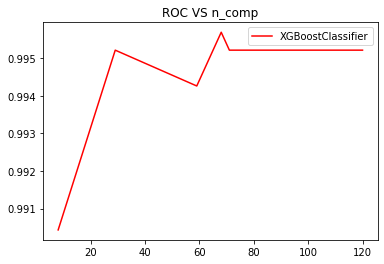




RandomForestClassifier | FR: XGB



Accuracy is 0.9855525972890498 when Features are 8



              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1049
           1       0.98      0.99      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



Accuracy is 0.9923572370041535 when Features are 29



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1.00      0.99      1014

    accuracy                           0.99      2063
   macro avg       0.99      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063



Accuracy is 0.9937871702739343 when Features are 59



              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1049
           1       0.99      1

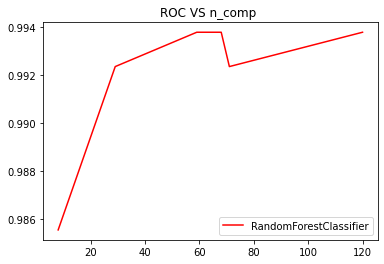




LogisticRegression | FR: XGB



ROC is 0.9519402342420601 when Features are 8



              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1049
           1       0.95      0.95      0.95      1014

    accuracy                           0.95      2063
   macro avg       0.95      0.95      0.95      2063
weighted avg       0.95      0.95      0.95      2063



ROC is 0.9694942868478104 when Features are 29



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1049
           1       0.97      0.97      0.97      1014

    accuracy                           0.97      2063
   macro avg       0.97      0.97      0.97      2063
weighted avg       0.97      0.97      0.97      2063



ROC is 0.983629567372326 when Features are 59



              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1049
           1       0.98      0.99      0.98      1

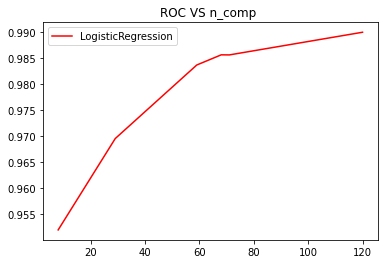

In [558]:
print("\n\n\nXGBClassifier | FR: XGB\n")
n_comp_xgb_c_xgb, acc_list_xgb_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_xgb_list, X_test_xgb_list, Y_train_xgb, Y_test_xgb, n_comp_xgb)
plt.plot(n_comp_xgb_c_xgb, acc_list_xgb_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: XGB\n")
n_comp_xgb_c_rf, acc_list_xgb_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_xgb_list, X_test_xgb_list, Y_train_xgb, Y_test_xgb, n_comp_xgb)
plt.plot(n_comp_xgb_c_rf, acc_list_xgb_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: XGB\n")
n_comp_xgb_c_logreg, acc_list_xgb_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_xgb_list, X_test_xgb_list, Y_train_xgb, Y_test_xgb, n_comp_xgb)
plt.plot(n_comp_xgb_c_logreg, acc_list_xgb_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

# RF

In [441]:
def RF_(data):

  names = data.columns
  data_X = data.iloc[:,0:len(data.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y=  data.iloc[:,len(data.columns)-1] # target variable only
  oversample = SMOTE()
  X, y = oversample.fit_resample(data_X, data_Y)
  X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42) # split

  threshold_list = [0.009,0.007,0.006,0.005,0.004,0.003,0.002,0.0008,0.0005, 0.0003, 0.0001, 1e-20, 1e-50, 0]                                                                                                                                                                  


  X_train_rf_list = []
  X_test_rf_list = []
  n_comp_rf = []

  for thr in tqdm(threshold_list, desc = 'Running RF on different Thresholds:' ):
    rf = SelectFromModel(RandomForestClassifier(n_estimators = 1000), threshold=thr )
    rf.fit(X_train, Y_train)
    selected_feat= len(X_train.columns[(rf.get_support())])
    n_comp_rf.append(selected_feat)
    X_train_rf = rf.transform(X_train)
    X_test_rf = rf.transform(X_test)
    X_train_rf_list.append(X_train_rf)
    X_test_rf_list.append(X_test_rf)  

  return(X_train_rf_list, X_test_rf_list, n_comp_rf, Y_train, Y_test)

X_train_rf_list, X_test_rf_list, n_comp_rf, Y_train_rf, Y_test_rf = RF_(df0)

Running RF on different Thresholds:: 100%|██████████| 14/14 [02:42<00:00, 11.61s/it]





XGBClassifier | FR: RF

[01:03:28] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9975983195238651  when Features are 19



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9971198506243435  when Features are 21



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9975983195238651  when Features are 23



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:30] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9980767884233867  when Features are 26



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:30] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9980861244019138  when Features are 29



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9980861244019138  when Features are 37



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:32] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.999043062200957  when Features are 46



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:32] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9980767884233867  when Features are 72



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:33] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.999043062200957  when Features are 81



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:34] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.9995215311004785  when Features are 87



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:35] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.999043062200957  when Features are 102



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:36] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.999043062200957  when Features are 116



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:37] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.999043062200957  when Features are 116



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

[01:03:38] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)




ROC is 0.999043062200957  when Features are 120



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

    Features       ROC
0         19  0.997598
1         21  0.997120
2         23  0.997598
3         26  0.998077
4         29  0.998086
5         37  0.998086
6         46  0.999043
7         72  0.998077
8         81  0.999043
9         87  0.999522
10       102  0.999043
11       116  0.999043
13       120  0.999043


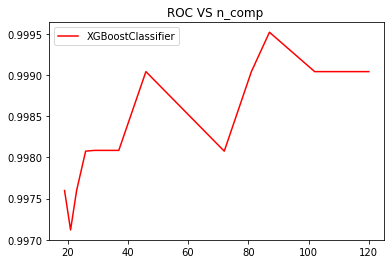




RandomForestClassifier | FR: RF



Accuracy is 0.9966413817248221 when Features are 19



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070



Accuracy is 0.9952059750262575 when Features are 21



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1.00      1.00      1025

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070



Accuracy is 0.9966413817248221 when Features are 23



              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1045
           1       0.99      1

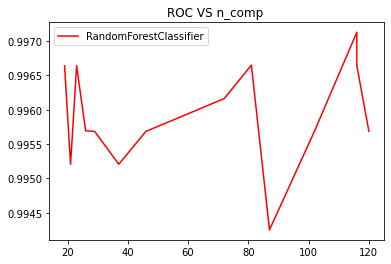




LogisticRegression | FR: RF



ROC is 0.9695670439957988 when Features are 19



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1045
           1       0.97      0.97      0.97      1025

    accuracy                           0.97      2070
   macro avg       0.97      0.97      0.97      2070
weighted avg       0.97      0.97      0.97      2070



ROC is 0.9705426537518963 when Features are 21



              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1045
           1       0.97      0.97      0.97      1025

    accuracy                           0.97      2070
   macro avg       0.97      0.97      0.97      2070
weighted avg       0.97      0.97      0.97      2070



ROC is 0.9792391177500291 when Features are 23



              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1045
           1       0.98      0.98      0.98      

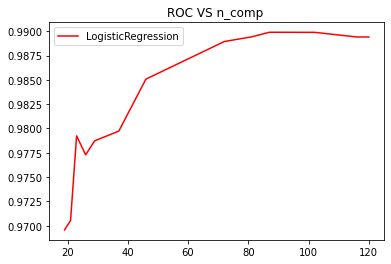

In [448]:
print("\n\n\nXGBClassifier | FR: RF\n")
n_comp_rf_c_xgb, acc_list_rf_c_xgb = XGBoost_ridge_RF_lasso_xgb_rfe(X_train_rf_list, X_test_rf_list, Y_train_rf, Y_test_rf, n_comp_rf)
plt.plot(n_comp_rf_c_xgb, acc_list_rf_c_xgb, label = 'XGBoostClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nRandomForestClassifier | FR: RF\n")
n_comp_rf_c_rf, acc_list_rf_c_rf = RF_ridge_RF_lasso_xgb_rfe(X_train_rf_list, X_test_rf_list, Y_train_rf, Y_test_rf, n_comp_rf)
plt.plot(n_comp_rf_c_rf, acc_list_rf_c_rf, label = 'RandomForestClassifier', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

print("\n\n\nLogisticRegression | FR: RF\n")
n_comp_rf_c_logreg, acc_list_rf_c_logreg = logreg_ridge_RF_lasso_xgb_rfe(X_train_rf_list, X_test_rf_list, Y_train_rf, Y_test_rf, n_comp_rf)
plt.plot(n_comp_rf_c_logreg, acc_list_rf_c_logreg, label = 'LogisticRegression', color = 'r')
plt.title('ROC VS n_comp ')
plt.legend()
plt.show()

# Naive Bayes Models

In [535]:
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:-500,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:-500,len(df0.columns)-1] # target variable only

data_Vx =  df0.iloc[500:, 0: len(df0.columns)-1]
data_Vy = df0.iloc[500:,len(df0.columns)-1]

#oversample = SMOTE()
#X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

# Gaussian Naive Bayes

ROC is : 0.9032291238173592


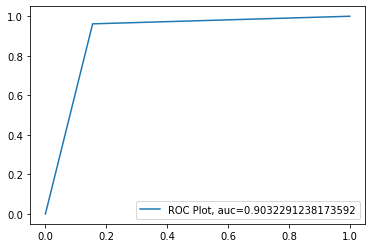

In [532]:
#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))
acc = roc_auc_score(Y_test,y_pred)
print('ROC is :',acc)
#y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(Y_test,  y_pred)
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Multinomial Naive Bayes

ROC is : 0.8439788634467414


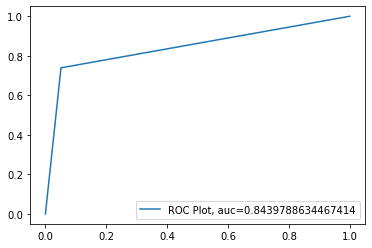

In [543]:
#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = MultinomialNB(alpha = 0.6)
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))
acc = roc_auc_score(Y_test,y_pred)
print('ROC is :',acc)
#y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(Y_test,  y_pred)
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Bernoulli Naive Bayes

ROC is : 0.9383980717530361


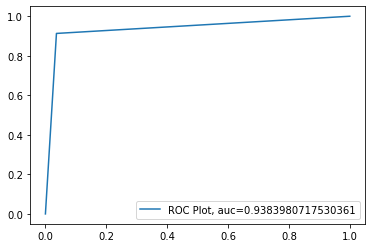

In [551]:
#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = BernoulliNB(alpha = 0.5)
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
#print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (Y_test != y_pred).sum()))
acc = roc_auc_score(Y_test,y_pred)
print('ROC is :',acc)
#y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(Y_test,  y_pred)
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [75]:
54/(155/100)**2

22.476586888657646